Perform the data exploration step (i.e. evaluate your data, # of observations, details about your data distributions, scales, missing data, column descriptions)

Plot your data. For tabular data, you will need to run scatter.


How will you preprocess your data? You should explain this in your readme.md file and link your jupyter notebook to it. Your jupyter notebook should be uploaded to your repo.


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('speeddating.csv')
df

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',...,b'[0-3]',b'[3-5]',7.0,NaN,b'[6-8]',b'[0-4]',1.0,b'1',b'1',b'1'
3,b'',1.0,b'female',21.0,23.0,2.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
4,b'',1.0,b'female',21.0,24.0,3.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,b'',21.0,b'male',25.0,26.0,1.0,b'[0-1]',b'European/Caucasian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',2.0,5.0,b'[0-5]',b'[5-6]',0.0,b'0',b'1',b'0'
8374,b'',21.0,b'male',25.0,24.0,1.0,b'[0-1]',b'European/Caucasian-American',b'Other',b'0',...,b'[0-3]',b'[3-5]',4.0,4.0,b'[0-5]',b'[0-4]',0.0,b'0',b'0',b'0'
8375,b'',21.0,b'male',25.0,29.0,4.0,b'[4-6]',b'European/Caucasian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,5.0,b'[6-8]',b'[5-6]',0.0,b'0',b'0',b'0'
8376,b'',21.0,b'male',25.0,22.0,3.0,b'[2-3]',b'European/Caucasian-American',b'Asian/Pacific Islander/Asian-American',b'0',...,b'[0-3]',b'[3-5]',5.0,5.0,b'[0-5]',b'[5-6]',0.0,b'0',b'1',b'0'


In [ ]:
# Check for missing data - we will need to account for this in preprocessing
df.isnull().sum()

has_null                              0
wave                                  0
gender                                0
age                                  95
age_o                               104
d_age                                 0
d_d_age                               0
race                                  0
race_o                                0
samerace                              0
importance_same_race                 79
importance_same_religion             79
d_importance_same_race                0
d_importance_same_religion            0
field                                 0
pref_o_attractive                    89
pref_o_sincere                       89
pref_o_intelligence                  89
pref_o_funny                         98
pref_o_ambitious                    107
pref_o_shared_interests             129
d_pref_o_attractive                   0
d_pref_o_sincere                      0
d_pref_o_intelligence                 0
d_pref_o_funny                        0


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.dtypes

has_null                            object
wave                               float64
gender                              object
age                                float64
age_o                              float64
d_age                              float64
d_d_age                             object
race                                object
race_o                              object
samerace                            object
importance_same_race               float64
importance_same_religion           float64
d_importance_same_race              object
d_importance_same_religion          object
field                               object
pref_o_attractive                  float64
pref_o_sincere                     float64
pref_o_intelligence                float64
pref_o_funny                       float64
pref_o_ambitious                   float64
pref_o_shared_interests            float64
d_pref_o_attractive                 object
d_pref_o_sincere                    object
d_pref_o_in

There are some columns that are not so useful, such as wave and has_null, so we will drop those

In [ ]:
df.shape

(8378, 123)

In [ ]:
# # convert match (our Y class) to numerical 1 and 0
# for i in range(df.shape[0]):
#   if df['match'][i] == "b'0'":
#     df['match'][i] = 0
#   else:
#     df['match'][i] = 1

<ipython-input-7-1f0c252eb3b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['match'][i] = 0
<ipython-input-7-1f0c252eb3b0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['match'][i] = 1


There are 8378 observations and 123 features, but we will be dropping a lot of the features for simpler analysis.

We want to find out whether or not two people will be a match based on the difference in the values of their responses, so we will only be looking at the "difference" features (i.e. those that start with a "d")

We can further categorize this

# Self Perception


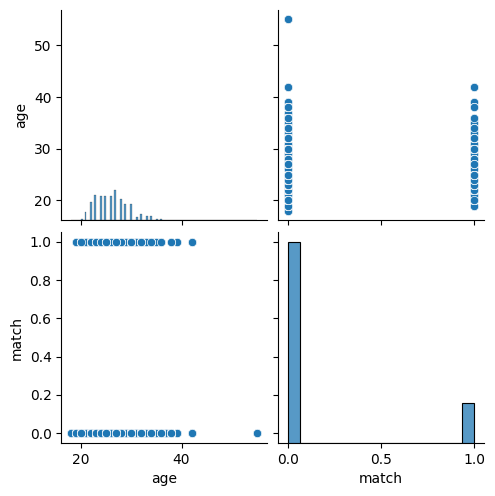

In [ ]:
# Let's first explore the correlations of basics stats (race, age) and match

new = pd.DataFrame([df.age, df.match]).transpose()
sns.pairplot(new)

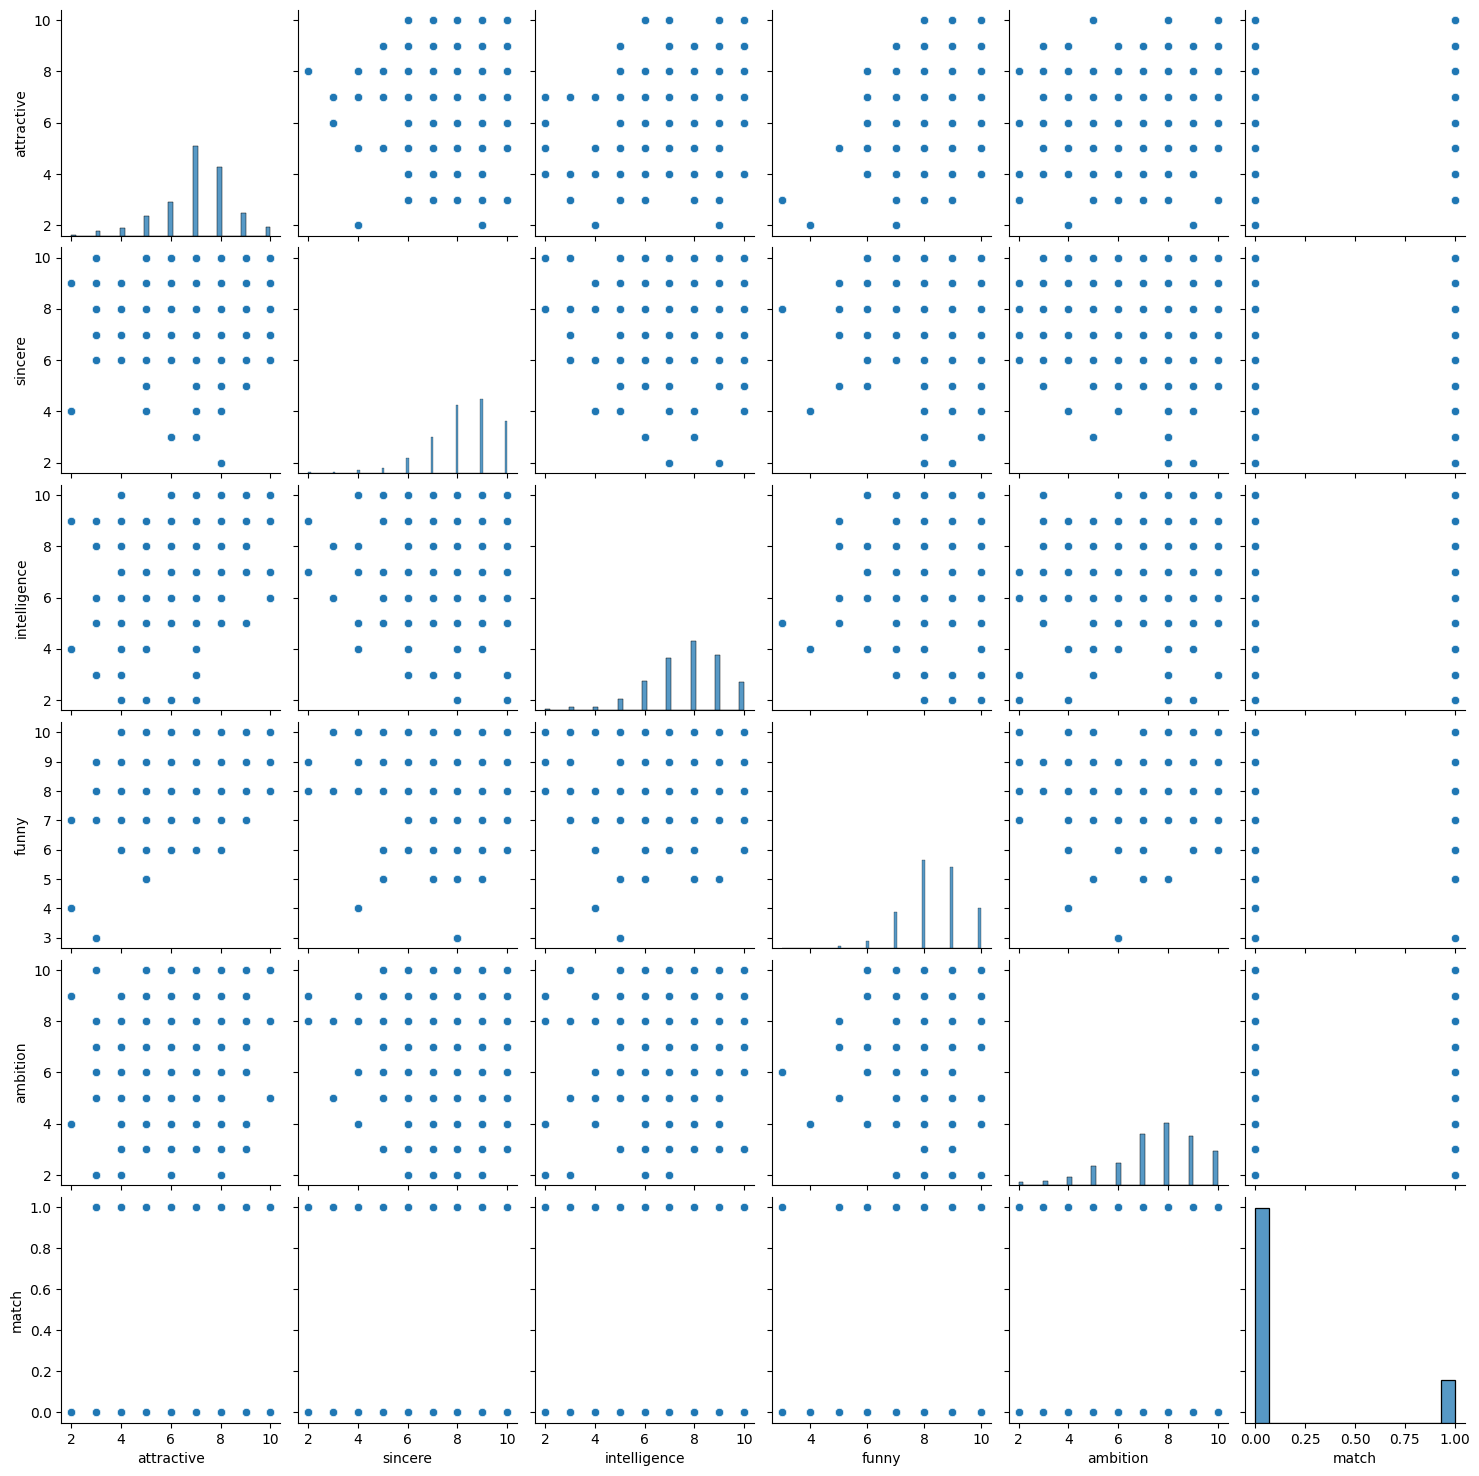

In [ ]:
# There are a set of features where the participants rate themselves on
# 5 scales (attractive, sincere, intelligence, funny, ambition).
# Let's look at whether there are trends between their self-ratings and match

self_perception = pd.DataFrame([df.attractive, df.sincere, df.intelligence, df.funny, df.ambition, df.match]).transpose()
sns.pairplot(self_perception)

<Axes: >

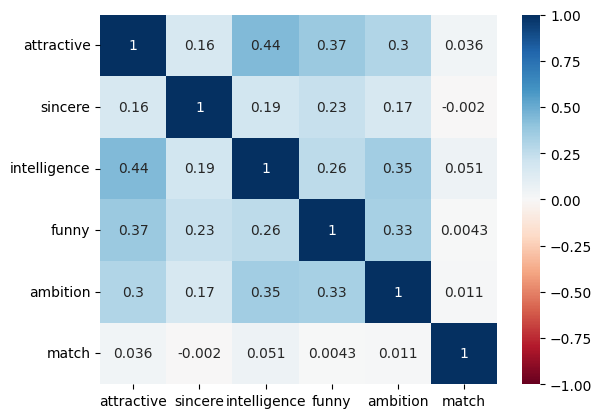

In [ ]:
self_per_corr = self_perception.corr()
sns.heatmap(self_per_corr,  vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

There doesn't seem to be much of a correlation between match and self-perception, so we may drop these

# Hobbies


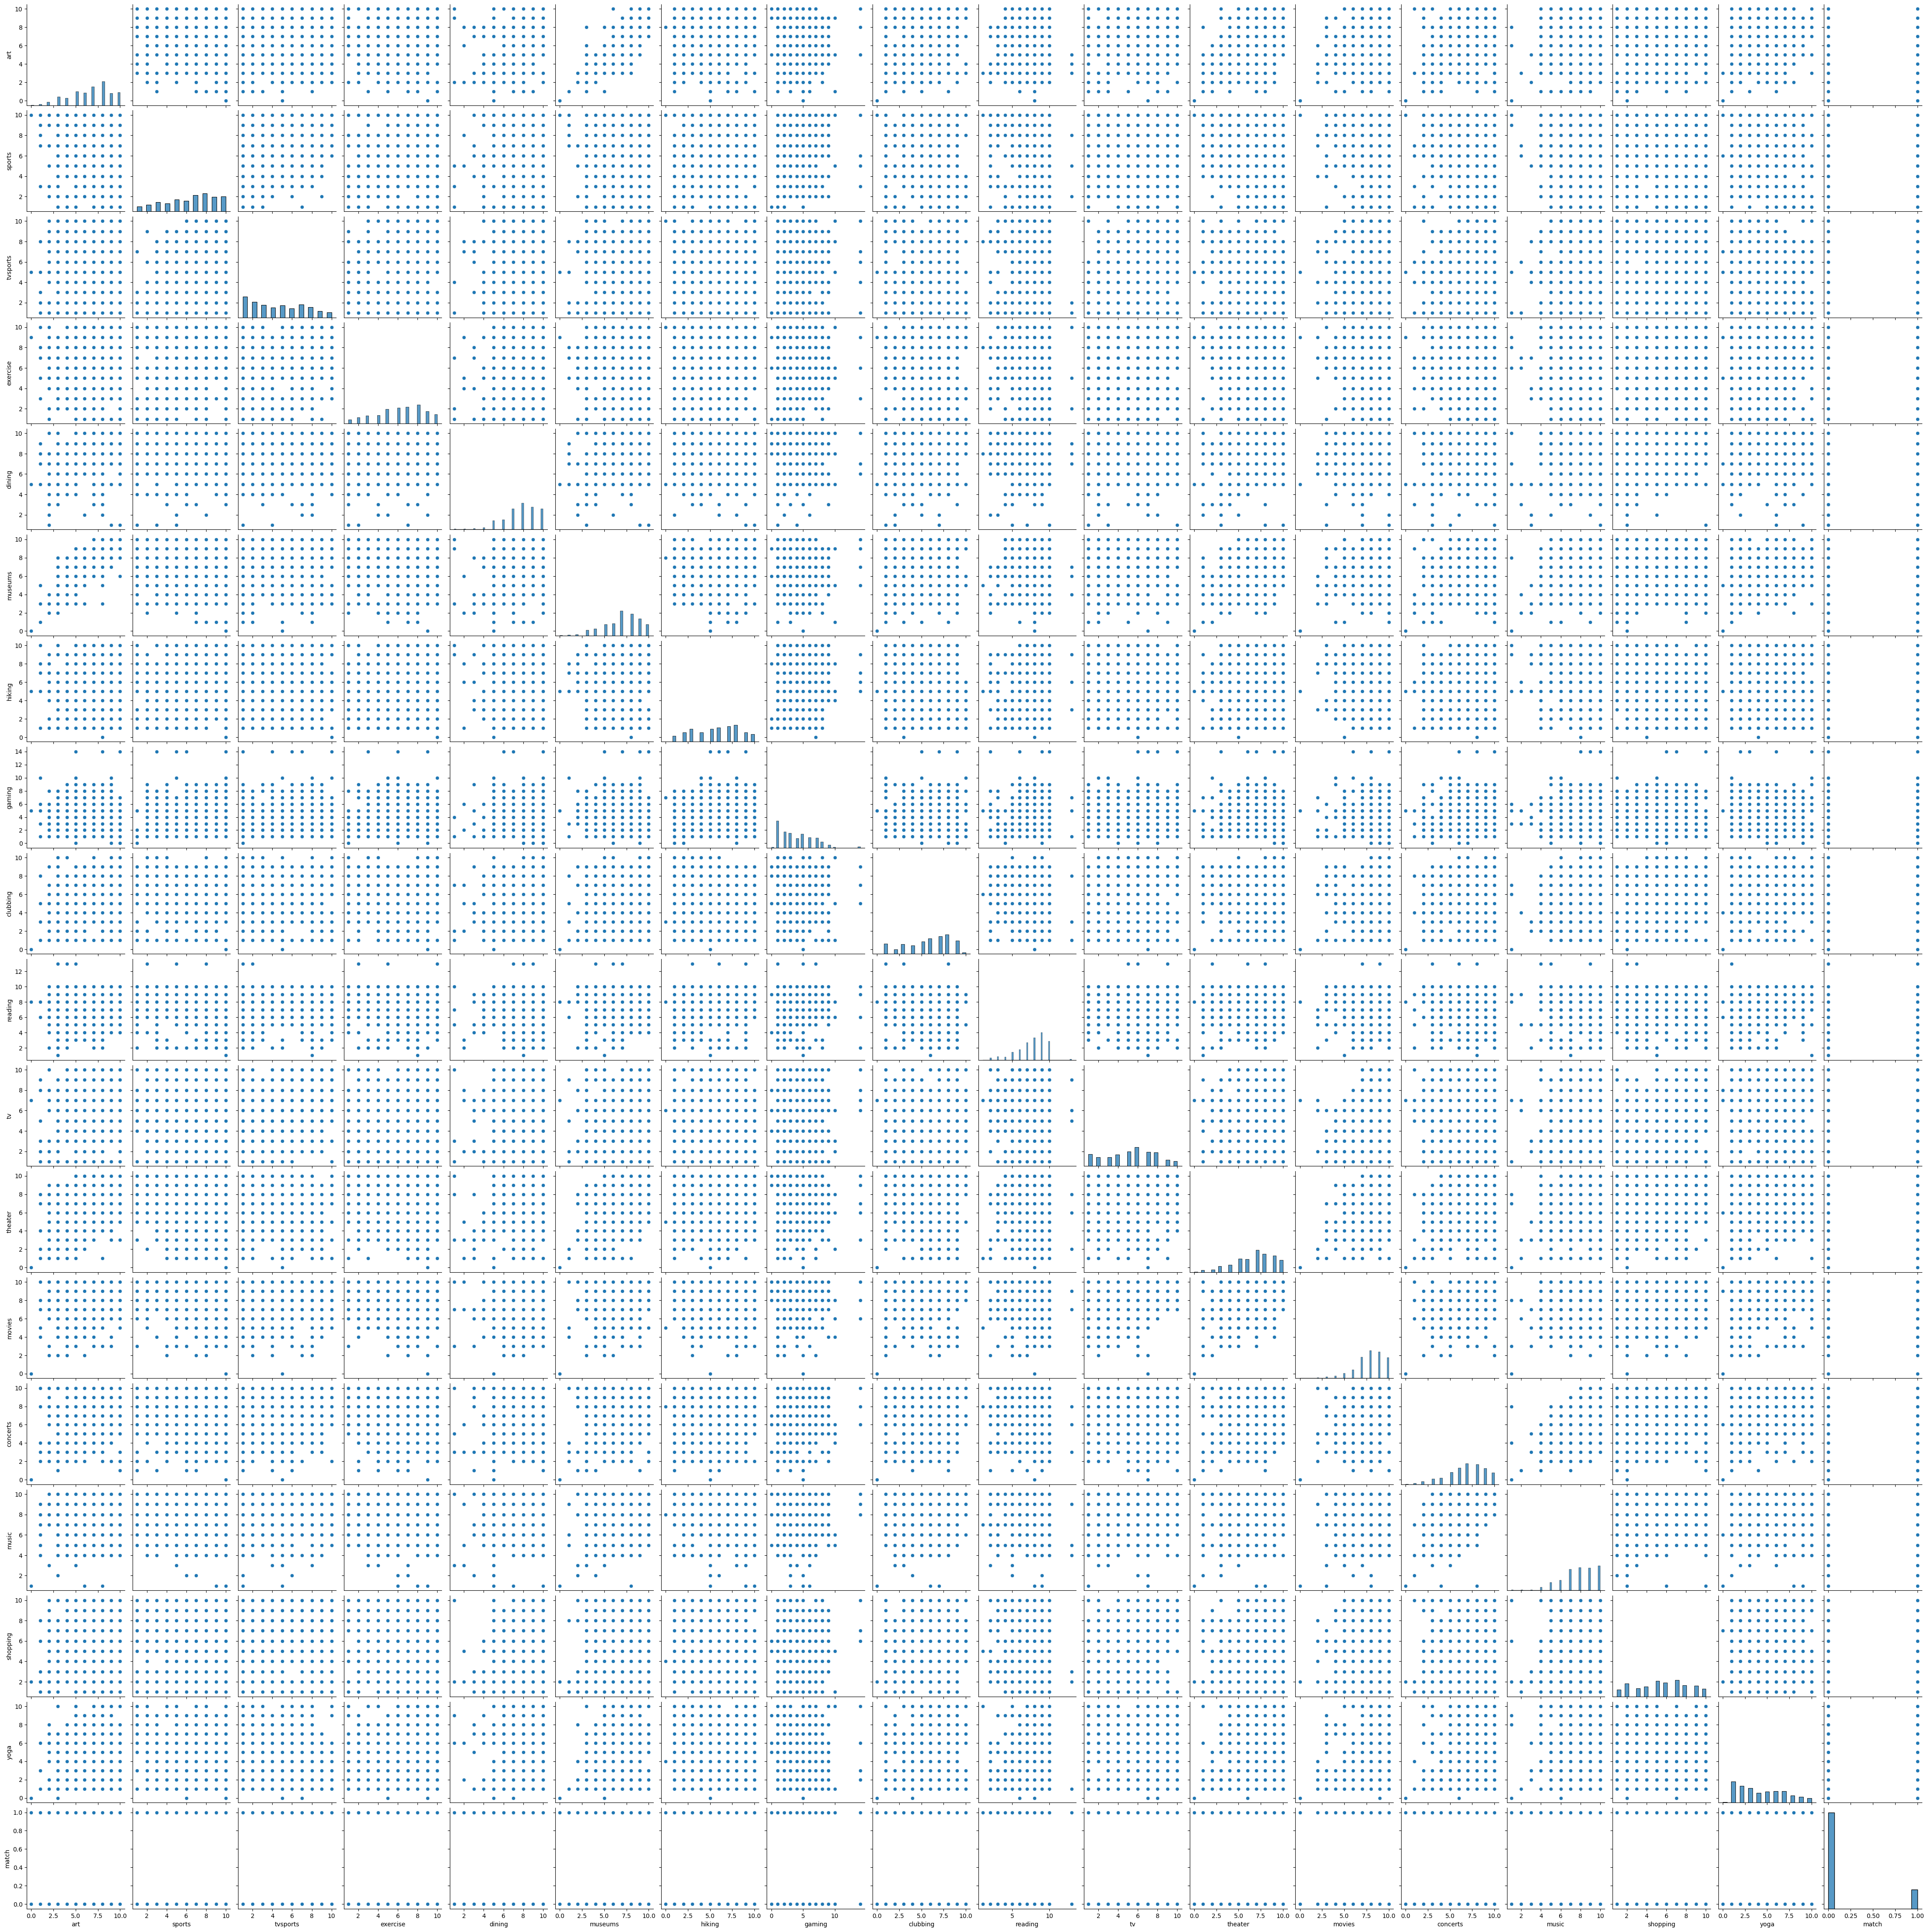

In [ ]:
hobbies = pd.DataFrame([df.art,df.sports,df.tvsports,df.exercise,df.dining,df.museums,df.hiking,df.gaming,df.clubbing,df.reading,df.tv,df.theater,
                        df.movies,df.concerts,df.music,df.shopping,df.yoga,df.match]).transpose()

sns.pairplot(hobbies)

<Axes: >

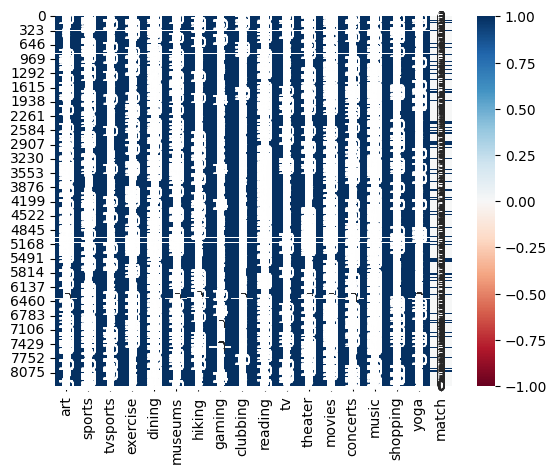

In [ ]:
sns.heatmap(hobbies,  vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')